# Neural Computing - Individual Coursework

In [1]:
#some basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,classification_report, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
#Load Data

data = pd.read_excel('default of credit card clients.xlsx')
df_data = pd.DataFrame(data)
df_data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
#rephrasing the header. 
new_headers = df_data.iloc[0]
df_data.columns = new_headers
df_data = df_data.drop(0)
df_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
#droping some unwanted columns
df_data = df_data.drop(columns=["ID"])
df_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
# Pre-processing 
# check for null values and dtypes
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

In [6]:
#since all the columns are already encoded with a numerical value, we don't do a lable encoding. 
df_data = df_data.astype(int)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int32
 1   SEX                         30000 non-null  int32
 2   EDUCATION                   30000 non-null  int32
 3   MARRIAGE                    30000 non-null  int32
 4   AGE                         30000 non-null  int32
 5   PAY_0                       30000 non-null  int32
 6   PAY_2                       30000 non-null  int32
 7   PAY_3                       30000 non-null  int32
 8   PAY_4                       30000 non-null  int32
 9   PAY_5                       30000 non-null  int32
 10  PAY_6                       30000 non-null  int32
 11  BILL_AMT1                   30000 non-null  int32
 12  BILL_AMT2                   30000 non-null  int32
 13  BILL_AMT3                   30000 non-null  int32
 14  BILL_A

In [7]:
#studying the features - unique values of each feature
df_data.nunique()

0
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [8]:
#checking the categorical features
print(df_data['SEX'].unique())
print(df_data['EDUCATION'].unique())
print(df_data['MARRIAGE'].unique())

#The '0' in the EDUCATION and MARRIAGE seems to be a missing value filled with '0'.
#and in EDUCATION 5 and 6 are not described in the data description.

[2 1]
[2 1 3 5 4 6 0]
[1 2 3 0]


In [9]:
#missing values
df_data.loc[(df_data['EDUCATION'] == 0) | (df_data['MARRIAGE'] == 0)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
219,110000,2,3,0,31,0,0,0,0,0,...,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
810,160000,2,2,0,37,0,0,0,0,0,...,28574,27268,28021,35888,1325,891,1000,1098,426,0
821,200000,2,3,0,51,-1,-1,-1,-1,0,...,780,390,390,0,390,780,0,390,390,0
1020,180000,2,3,0,45,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1444,200000,1,3,0,51,-1,-1,-1,-1,0,...,2529,1036,4430,5020,9236,2529,0,4430,6398,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28603,200000,2,3,0,37,1,-1,-1,-1,-1,...,4000,22800,5716,35000,5000,4000,22800,5716,0,0
28604,110000,2,3,0,44,2,2,2,2,2,...,41476,42090,43059,2000,2000,1700,1600,1800,1800,1
28767,80000,2,3,0,40,2,2,3,2,-1,...,1375,779,5889,5000,0,0,885,5889,4239,0
29079,100000,2,3,0,56,1,2,0,0,2,...,31134,30444,32460,0,1500,2700,0,2400,0,0


In [10]:
#just checking the EDUCATION category 5 and 6.
df_data.loc[(df_data['EDUCATION'] == 5) | (df_data['EDUCATION'] == 6)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
48,150000,2,5,2,46,0,0,-1,0,0,...,1170,0,0,1013,1170,0,0,0,0,1
70,20000,1,5,2,22,2,0,0,0,0,...,18085,11205,5982,0,1200,1000,500,1000,0,0
386,410000,2,5,1,42,0,0,0,0,0,...,240865,234939,240176,15000,14000,9000,8500,9000,8300,0
503,230000,2,6,2,46,0,0,0,0,0,...,186635,189896,193351,10000,9000,8000,8000,7500,7000,0
505,30000,1,6,1,53,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29812,50000,1,5,2,46,0,0,0,-1,0,...,19183,19563,19157,1423,1000,19183,687,696,776,0
29837,180000,1,6,1,34,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29840,150000,1,5,1,36,0,0,0,0,0,...,136378,139219,142172,5500,3800,3900,4000,4100,4100,0
29921,50000,1,5,1,45,2,0,0,0,0,...,50947,51020,0,3000,3428,2002,1023,0,0,1


In [11]:
#Assumimng that the zeros are filled in place of NA and removing those.
df_data_cl = df_data.loc[(df_data['EDUCATION'] != 0) & (df_data['MARRIAGE'] != 0)]
df_data_cl


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [12]:
#Correlation Analysis to analyse the highly correlated features with the class attribute

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,,,,,,,,,,,,,,,,,,,,,
LIMIT_BAL,1.000000,0.024953,-0.218676,-0.110683,0.144802,-0.271175,-0.296197,-0.285901,-0.267423,-0.249376,...,0.294143,0.295752,0.290608,0.195311,0.178245,0.210059,0.203216,0.217263,0.219702,-0.153718
SEX,0.024953,1.000000,0.013381,-0.030077,-0.091190,-0.057529,-0.070810,-0.066400,-0.060520,-0.055110,...,-0.021809,-0.016998,-0.016760,-0.000172,-0.001268,-0.008386,-0.002176,-0.001666,-0.002610,-0.039843
EDUCATION,-0.218676,0.013381,1.000000,-0.138646,0.175544,0.105372,0.121256,0.113609,0.108750,0.097314,...,-0.000159,-0.007330,-0.008876,-0.038009,-0.029446,-0.039589,-0.038013,-0.040263,-0.037159,0.028118
MARRIAGE,-0.110683,-0.030077,-0.138646,1.000000,-0.416691,0.019278,0.024165,0.032862,0.032740,0.035413,...,-0.025481,-0.027528,-0.023282,-0.005393,-0.009009,-0.003941,-0.013480,-0.002149,-0.007571,-0.026154
AGE,0.144802,-0.091190,0.175544,-0.416691,1.000000,-0.039111,-0.049983,-0.052779,-0.049399,-0.053711,...,0.051818,0.049818,0.048053,0.026636,0.021756,0.029383,0.021583,0.023040,0.019670,0.014224


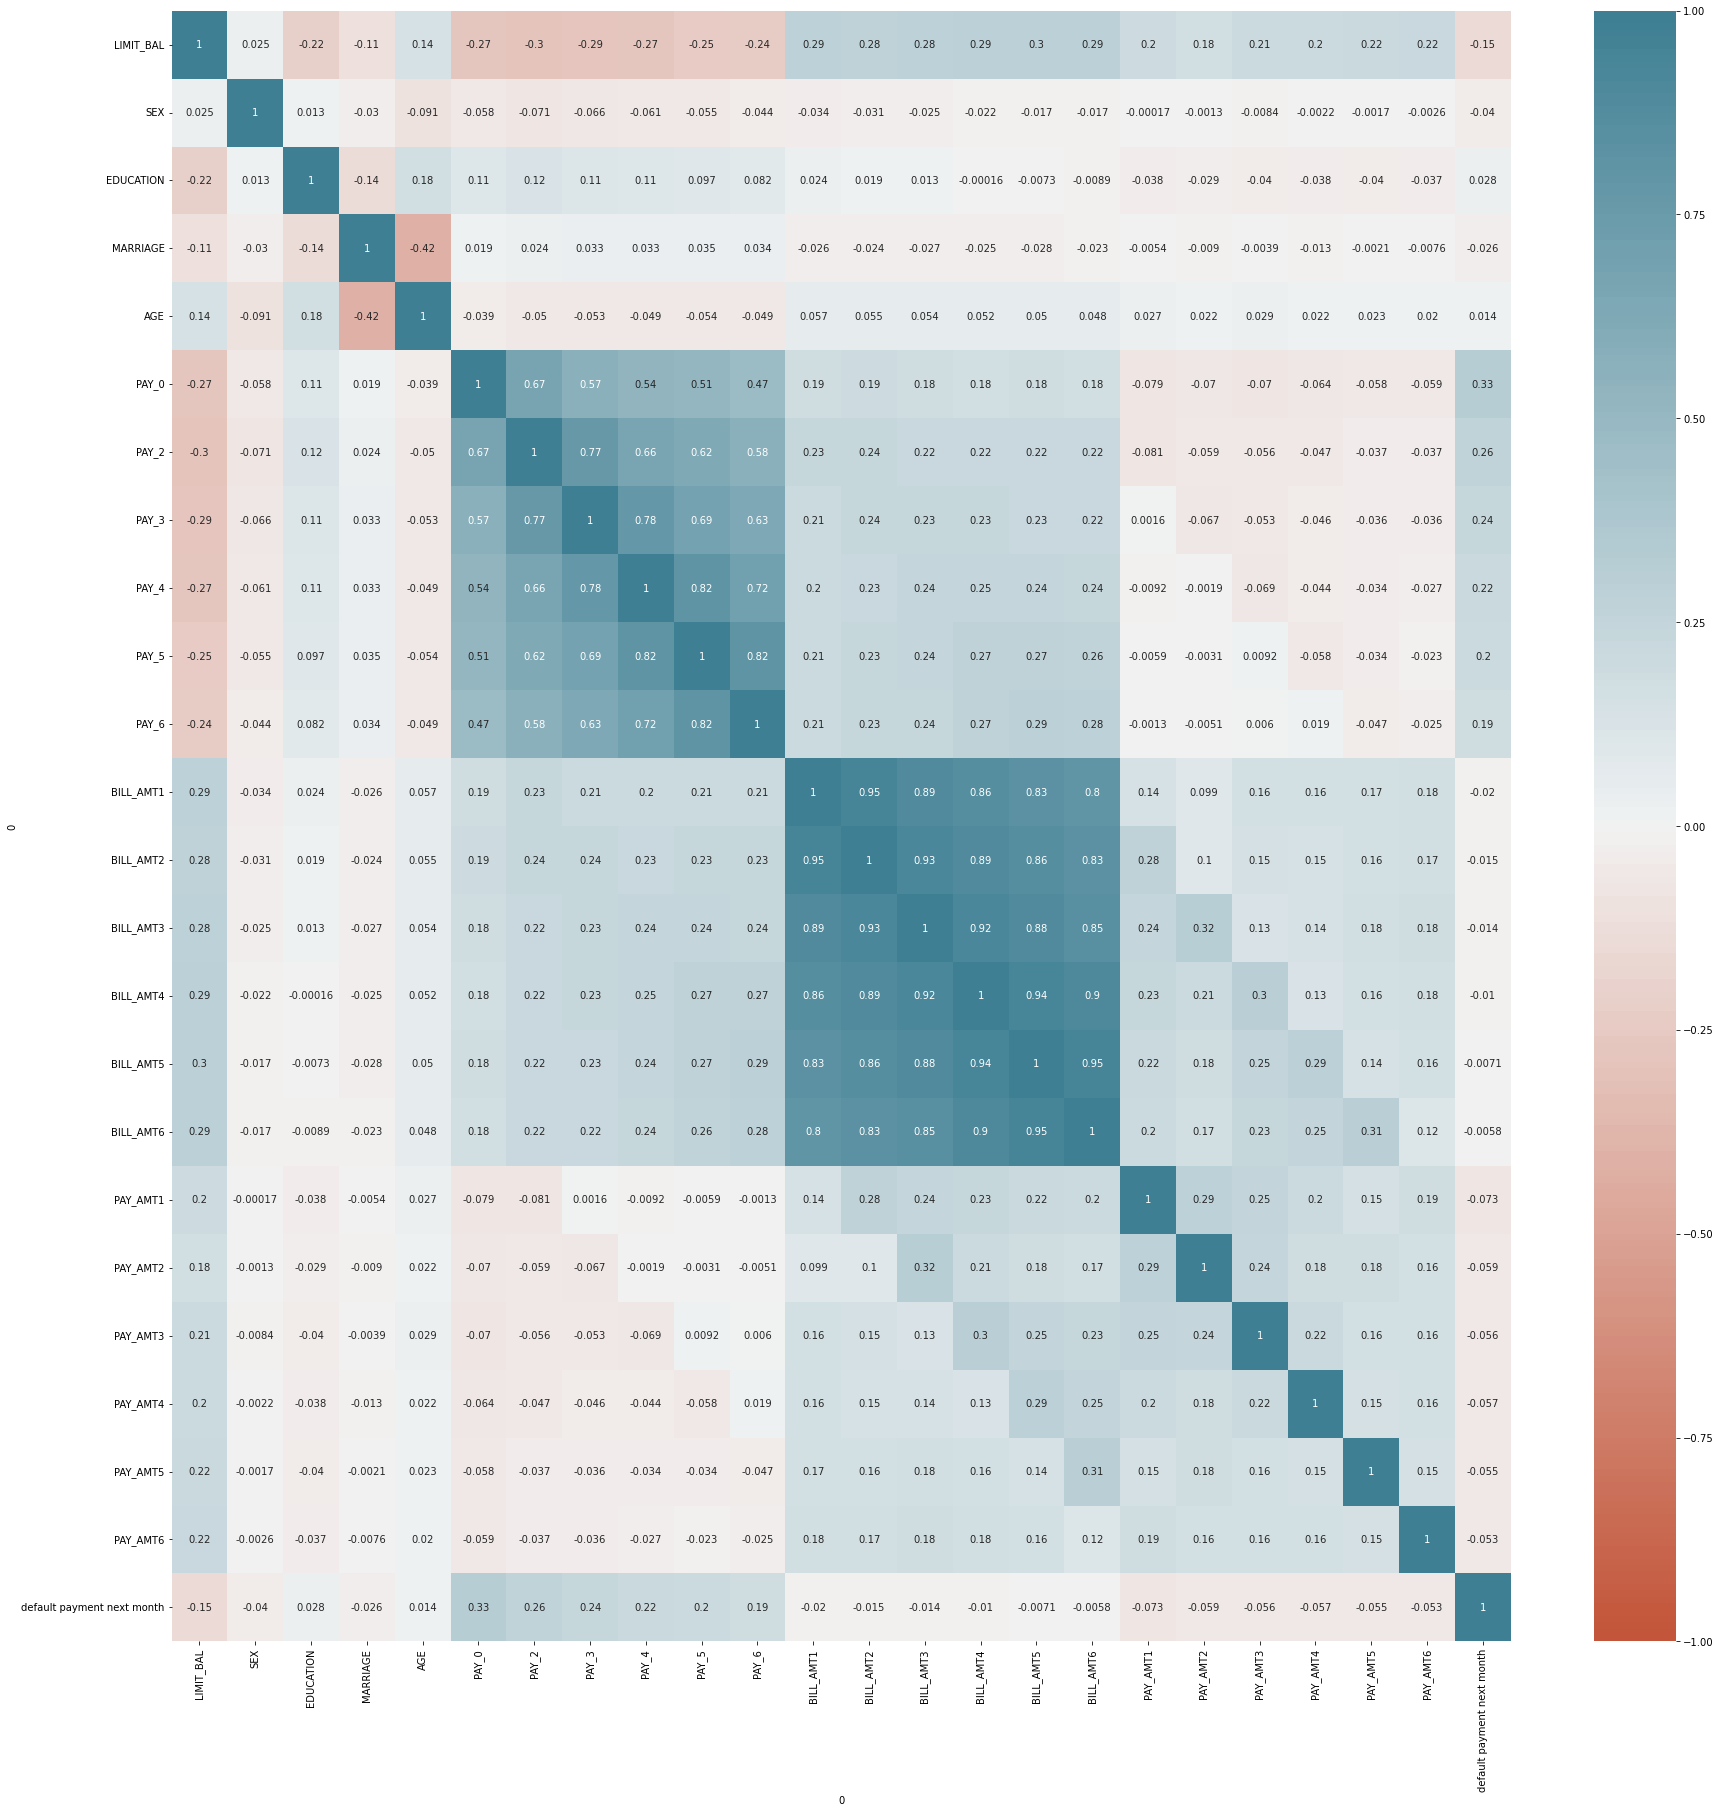

In [13]:
# create a correlation matrix
corr = df_data_cl.corr()

# plot it in seaborn heatmap
import seaborn as sns

plt.figure(figsize = (30,30))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, 
                 cmap=sns.diverging_palette(20, 220, n=200), 
                 square=False,
                annot=True)
corr.head()

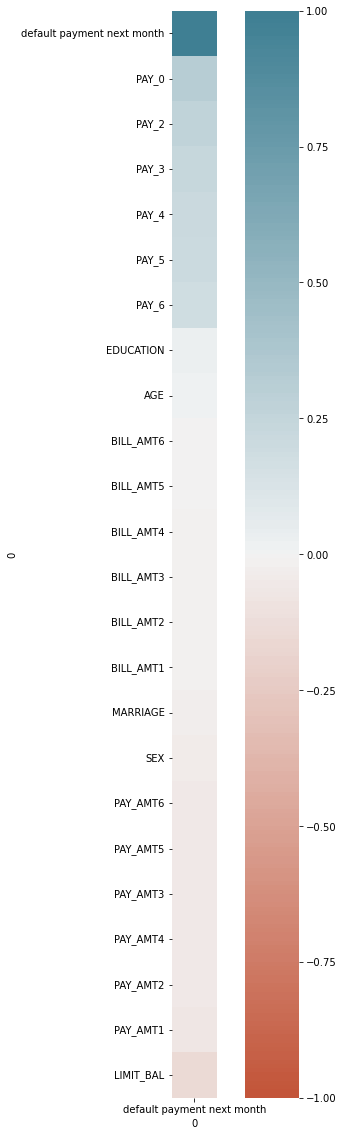

In [14]:
corr_default_payment_next_month = corr[['default payment next month']]

corr_default_payment_next_month = corr_default_payment_next_month.sort_values(by='default payment next month', ascending = False)

plt.figure(figsize = (10,20))
ax = sns.heatmap (corr_default_payment_next_month, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20,220, n=200),
                 square=True)

Text(0.5, 1.0, 'Distribution of target attribute')

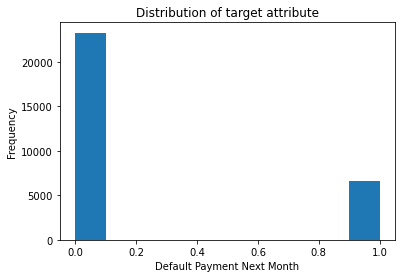

In [32]:
#Preparing dataset for models
#check the target class distribution

plt.hist(df_data_cl["default payment next month"])
plt.xlabel('Default Payment Next Month')
plt.ylabel('Frequency')
plt.title('Distribution of target attribute')

Use this 'df_data_cl' dataframe lable encoded dataset.

In [16]:
#One Hot Encoding
df_cl_ohe = pd.get_dummies(df_data_cl, columns=['SEX', 
                                    'MARRIAGE', 
                                    'EDUCATION', 
                                    'PAY_0',
                                    'PAY_2',
                                    'PAY_3',
                                    'PAY_4',
                                    'PAY_5',
                                    'PAY_6'])
df_cl_ohe.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
1,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


NOTE: Can do downsampling (this looses some info from the data) or upsampling (this is better)

# Model1 - MLP_baseline with SMOTE and OHE

In [21]:
#split dependant and independant variables 
x = df_cl_ohe.drop('default payment next month', axis=1).values
y = df_cl_ohe['default payment next month'].values

#split train and test 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

#Handling the imbalanced dataset using SMOTE. 
smote = SMOTE()
x_train_smt, y_train_smt = smote.fit_resample(x_train, y_train)

#split training and validation dataset
x_trainT, x_val, y_trainT, y_val = train_test_split(x_train_smt,y_train_smt, test_size=0.25, random_state=42)

x_trainT = torch.tensor(np.array(x_trainT), dtype=torch.float32)
y_trainT = torch.tensor(np.array(y_trainT), dtype=torch.long)
x_val = torch.tensor(np.array(x_train), dtype=torch.float32)
y_val = torch.tensor(np.array(y_train), dtype=torch.long)

x_test = torch.tensor(np.array(x_test), dtype=torch.float32)
y_test = torch.tensor(np.array(y_test), dtype=torch.long)

#Architecture
class modelNN(nn.Module):
    def __init__(self):
        super(modelNN, self).__init__()
        self.fc1 = nn.Linear(x_trainT.shape[1], 60)
        self.fc2 = nn.Linear(60, 2)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        
    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

#accuracy
def accuracy(pred_output, actual_output):
    out_compare = torch.eq(torch.argmax(pred_output, dim = 1), actual_output)
    
    acc = (torch.count_nonzero(out_compare) / actual_output.shape[0]) * 100
    
    return float(acc)

#Initialize the model
model = modelNN()

#Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#finding the test losses before training
y_pred = model(x_test)
before_train = criterion(y_pred, y_test)
print('Loss before traing the model', before_train.item())

#Train model

list_train_loss = []
list_train_acc = []
list_val_loss = []
list_val_acc = []
list_epoch = []

no_epochs = 500

for epoch in range(no_epochs):
    list_epoch.append(epoch)
    
    #train model
    output_train = model(x_trainT)
    loss = criterion(output_train, y_trainT)
    list_train_loss.append(loss.item())
    train_acc = accuracy(output_train, y_trainT)
    list_train_acc.append(train_acc)
         
    #resetting the parameters
    optimizer.zero_grad()
    
    #calculating weights and bias through back propagation
    loss.backward()
    
    #updating weights and bias
    optimizer.step()
        
    #validate the model
    output_val = model(x_val)
    val_loss = criterion(output_val, y_val)
    val_acc = accuracy(output_val, y_val)
    list_val_loss.append(val_loss.item())
    list_val_acc.append(val_acc)
    
    if epoch %50 == 0:
        print("Epoch ", epoch , ": train_loss:", loss.item(), "train_acc: ", train_acc, "val_loss: ", val_loss.item(), "val_acc: ", val_acc)
        

Loss before traing the model 0.717475175857544
Epoch  0 : train_loss: 0.6980909705162048 train_acc:  44.99637222290039 val_loss:  0.7149965167045593 val_acc:  34.13515090942383
Epoch  50 : train_loss: 0.6865324378013611 train_acc:  55.95051574707031 val_loss:  0.6938700079917908 val_acc:  55.084861755371094
Epoch  100 : train_loss: 0.6842923164367676 train_acc:  56.4774169921875 val_loss:  0.6848172545433044 val_acc:  57.23194885253906
Epoch  150 : train_loss: 0.6819390058517456 train_acc:  57.14558410644531 val_loss:  0.6726827621459961 val_acc:  60.42585372924805
Epoch  200 : train_loss: 0.681289553642273 train_acc:  57.2181282043457 val_loss:  0.679833173751831 val_acc:  58.56830978393555
Epoch  250 : train_loss: 0.6814504861831665 train_acc:  56.843955993652344 val_loss:  0.6744426488876343 val_acc:  59.27212905883789
Epoch  300 : train_loss: 0.6809931397438049 train_acc:  56.66068649291992 val_loss:  0.6763872504234314 val_acc:  59.50376510620117
Epoch  350 : train_loss: 0.6804022

In [22]:
#calc test loss after training
y_pred = model(x_test)
after_train = criterion(y_pred, y_test)
test_acc = accuracy(y_pred, y_test)

print('Test loss on the trained model', after_train.item())
print("Test accuracy ", test_acc)

Test loss on the trained model 0.6760312914848328
Test accuracy  60.39021682739258


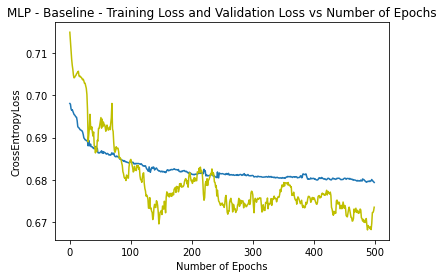

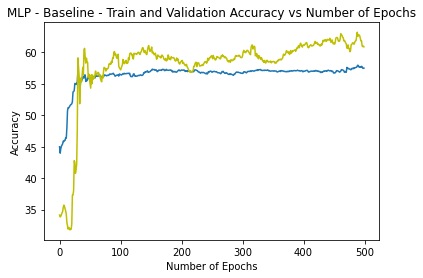

In [23]:
#MLP - Baseline - Training Loss and Validation Loss vs Number of Epochs
plt.plot(list_epoch, list_train_loss)
plt.plot(list_epoch, list_val_loss, 'y')
plt.xlabel("Number of Epochs")
plt.ylabel("CrossEntropyLoss")
plt.title("MLP - Baseline - Training Loss and Validation Loss vs Number of Epochs")
plt.show()

#MLP - Baseline - Train and Validation Accuracy vs Number of Epochs
plt.plot(list_epoch,list_train_acc)
plt.plot(list_epoch,list_val_acc,'y')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("MLP - Baseline - Train and Validation Accuracy vs Number of Epochs")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.64      0.71      5840
           1       0.28      0.49      0.35      1643

    accuracy                           0.60      7483
   macro avg       0.55      0.56      0.53      7483
weighted avg       0.70      0.60      0.64      7483



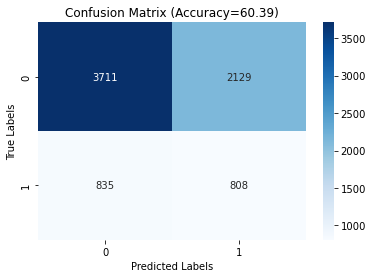

In [24]:
# Computing the confusion matrix and accuracy for the final epoch

from sklearn.metrics import confusion_matrix

y_pred = model(x_test)
y_pred_labels = np.argmax(y_pred.detach().numpy(), axis=1)
y_test_labels = y_test.detach().numpy()
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)

# per metrics
print(classification_report(y_test, y_pred_labels))

# Ploting the confusion matrix 
sns.heatmap(conf_matrix, annot = True, fmt='g', cmap='Blues')

# Adding labels and accuracy to the plot
plt.title('Confusion Matrix (Accuracy={:.2f})'.format(accuracy*100))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Inference 
From the above experiments its clear that SMOTE/Oversampling is having higher accuracy and OHE and lable encoding doesnot show much variations. 
So, in the hyperparameter optimizations we use SMOTE/oversampling and OHE. 

# MLP - using sklearn

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,classification_report, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV


In [26]:
#split data
#split dependant and independant variables 
x5 = df_cl_ohe.drop('default payment next month', axis=1)
y5 = df_cl_ohe['default payment next month']

#split train and test 
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5,y5, test_size=0.25, stratify=y5, random_state=42)

#Handling the imbalanced dataset using SMOTE. 
smote5 = SMOTE()
x_train_smt5, y_train_smt5 = smote.fit_resample(x_train5, y_train5)
df_cl_ohe.columns
x_test5

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
7967,150000,24,0,10437,4044,594,0,0,10437,4156,...,1,0,0,0,0,0,0,0,0,0
18732,80000,23,80457,82885,80495,78027,30052,30373,4350,0,...,0,0,1,0,0,0,0,0,0,0
5429,100000,42,17565,19700,18306,18239,17053,16753,3183,0,...,0,0,1,0,0,0,0,0,0,0
18830,340000,29,11806,13535,18784,26069,20007,15857,10000,6000,...,0,0,1,0,0,0,0,0,0,0
26094,240000,43,7994,20487,27770,22920,4779,7640,20487,27783,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22422,20000,34,17970,17389,20491,19803,19734,19613,0,3700,...,0,0,1,0,0,0,0,0,0,0
8581,230000,32,195409,203432,180786,95445,63048,99961,21844,14105,...,0,0,1,0,0,0,0,0,0,0
8083,50000,65,11763,11283,13288,12780,13522,13155,0,2200,...,0,0,0,1,0,0,0,0,0,0
25031,490000,57,59056,60236,62268,63264,62928,66334,2153,3000,...,0,0,1,0,0,0,0,0,0,0


In [27]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling X_train
x_train_smt5_sc = x_train_smt5.drop(['SEX_1', 'SEX_2', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8'], axis=1)

x_train_smt5_sc1 = scaler.fit_transform(x_train_smt5_sc)
x_train_smt5_sc1_df = pd.DataFrame(x_train_smt5_sc1)
x_train_smt5_sc1_df.columns = x_train_smt5_sc.columns
x_train_smt5_sc1_df

x_train_smt5_scaled = pd.concat([x_train_smt5_sc1_df, x_train_smt5[['SEX_1', 'SEX_2', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8']]], axis=1)
x_train_smt5_scaled


# scaling x_test 
scaler2 = StandardScaler()

x_test5_sc = x_test5.drop(['SEX_1', 'SEX_2', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'PAY_0_-2', 'PAY_0_-1',
       'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5',
       'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1',
       'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7',
       'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4',
       'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-2', 'PAY_6_-1',
       'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6',
       'PAY_6_7', 'PAY_6_8'], axis=1)

x_test5_sc1 = scaler2.fit_transform(x_test5_sc)
x_test5_sc1_df = pd.DataFrame(x_test5_sc1)
x_test5_sc1_df.columns = x_test5_sc.columns
x_test5_reset_index = x_test5[['SEX_1', 'SEX_2', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'PAY_0_-2', 'PAY_0_-1',
       'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5',
       'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1',
       'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7',
       'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4',
       'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-2', 'PAY_6_-1',
       'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6',
       'PAY_6_7', 'PAY_6_8']].reset_index()
x_test5_reset_index

x_test5_scaled = pd.concat([x_test5_sc1_df, x_test5_reset_index], axis=1)
x_test5_scaled.drop('index', axis=1, inplace=True)

x_train_smt5_scaled
x_test5_scaled


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-0.140548,-1.246446,-0.691909,-0.541088,-0.618797,-0.657521,-0.656810,-0.643255,0.315542,-0.087732,...,1,0,0,0,0,0,0,0,0,0
1,-0.680976,-1.353351,0.398806,0.474419,0.483491,0.531142,-0.167821,-0.139796,-0.073698,-0.320710,...,0,0,1,0,0,0,0,0,0,0
2,-0.526568,0.677847,-0.453789,-0.411248,-0.413164,-0.386655,-0.379333,-0.365559,-0.148323,-0.320710,...,0,0,1,0,0,0,0,0,0,0
3,1.326330,-0.711920,-0.531861,-0.497664,-0.406272,-0.266458,-0.331267,-0.380411,0.287597,0.015639,...,0,0,1,0,0,0,0,0,0,0
4,0.554289,0.784752,-0.583538,-0.400217,-0.276710,-0.314798,-0.579049,-0.516615,0.958200,1.236755,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,-1.144201,-0.177394,-0.448299,-0.443642,-0.381660,-0.362646,-0.335710,-0.318152,-0.351864,-0.113294,...,0,0,1,0,0,0,0,0,0,0
7479,0.477085,-0.391204,1.957151,2.164133,1.929510,0.798523,0.369071,1.013685,1.044975,0.469991,...,0,0,1,0,0,0,0,0,0,0
7480,-0.912589,3.136665,-0.532444,-0.529230,-0.485515,-0.470455,-0.436788,-0.425199,-0.351864,-0.197382,...,0,0,0,1,0,0,0,0,0,0
7481,2.484391,2.281424,0.108683,0.156947,0.220690,0.304517,0.367118,0.456289,-0.214188,-0.152535,...,0,0,1,0,0,0,0,0,0,0


# Model2 - MLP_baseline_model with default parameters

In [62]:
# MPLClassifier_baseline: running the model with all default values.

clf = MLPClassifier(random_state=42)

#Train the model
#define parameter
param_grid = {'max_iter': [500],}

# grid search and cross validation
baseline_model = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
baseline_model.fit(x_train_smt5_scaled, y_train_smt5)

#Test the model
y_predict_baseline_model = baseline_model.predict(x_test5_scaled)

accuracy : 0.800481090471736
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      5825
           1       0.59      0.34      0.43      1658

    accuracy                           0.80      7483
   macro avg       0.71      0.64      0.65      7483
weighted avg       0.78      0.80      0.78      7483



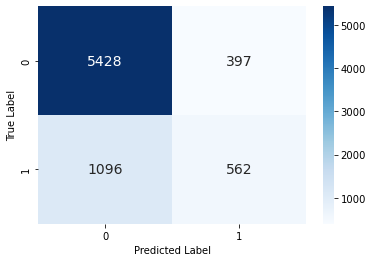

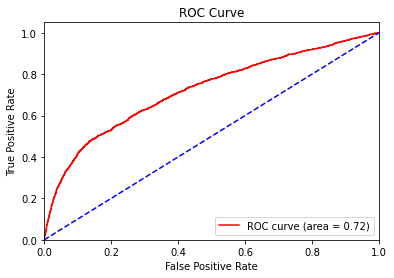

In [81]:
# performance metrics of the Model:

# Test accuracy
accuracy = accuracy_score(y_test5, y_predict_baseline_model)
print ('accuracy :', accuracy)

# per metrics
print(classification_report(y_test5, y_predict_baseline_model))

# Test - confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test5, y_predict_baseline_model)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#ROC Curve
y_score = baseline_model.predict_proba(x_test5_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Model3 - 1st hyperparameter optimization to get best architecture parameters. 

In [97]:
# Training the model to find the best architectural parameters,
clf_arc = MLPClassifier(random_state=42)

#define hyperparameter
param_grid = {
    'hidden_layer_sizes': [(20,), (50,), (60), (70), (120), (20, 20), (60, 60), (70, 70)],
    'activation': ['relu', 'tanh', 'logistic'],
    'max_iter': [500],
    'early_stopping': [True]
}

# grid search and cross validation
grid_search_arc = GridSearchCV(clf_arc, param_grid, cv=5, n_jobs=-1)
grid_search_arc.fit(x_train_smt5_scaled, y_train_smt5)

# print the best hyperparameters and the corresponding score
print(f"Best hyperparameters: {grid_search_arc.best_params_}")
print(f"Best score: {grid_search_arc.best_score_:.4f}")
results_df_arc = pd.DataFrame(grid_search_arc.cv_results_)
results_df_arc = results_df_arc.sort_values('rank_test_score')
results_df_arc

C:\Users\deenu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\deenu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\deenu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\deenu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\deenu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\deenu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Best hyperparameters: {'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': 70, 'max_iter': 500}
Best score: 0.8681


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_early_stopping,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,16.876461,5.261434,0.064511,0.023090,tanh,True,70,500,"{'activation': 'tanh', 'early_stopping': True,...",0.621942,0.837505,0.964235,0.954649,0.961946,0.868056,0.131962,1
12,15.290850,5.564148,0.055403,0.005781,tanh,True,120,500,"{'activation': 'tanh', 'early_stopping': True,...",0.608211,0.834645,0.965093,0.955222,0.965236,0.865681,0.137888,2
17,11.500344,0.891066,0.040103,0.007178,logistic,True,"(50,)",500,"{'activation': 'logistic', 'early_stopping': T...",0.607638,0.835789,0.955079,0.957940,0.954936,0.862276,0.135567,3
16,14.506772,2.879040,0.032254,0.005222,logistic,True,"(20,)",500,"{'activation': 'logistic', 'early_stopping': T...",0.594193,0.835932,0.958226,0.962518,0.958655,0.861905,0.142201,4
3,11.925842,4.126362,0.047206,0.021778,relu,True,70,500,"{'activation': 'relu', 'early_stopping': True,...",0.593477,0.835074,0.959227,0.954936,0.958512,0.860245,0.141576,5
18,12.086549,2.152360,0.035132,0.003788,logistic,True,60,500,"{'activation': 'logistic', 'early_stopping': T...",0.591618,0.837076,0.959371,0.955937,0.955508,0.859902,0.141954,6
21,10.367360,3.153574,0.043465,0.011097,logistic,True,"(20, 20)",500,"{'activation': 'logistic', 'early_stopping': T...",0.584752,0.836790,0.956652,0.958226,0.959514,0.859187,0.145045,7
20,19.447970,3.654581,0.054898,0.011842,logistic,True,120,500,"{'activation': 'logistic', 'early_stopping': T...",0.579745,0.835360,0.958369,0.963948,0.955937,0.858672,0.147531,8
8,10.378431,2.459588,0.049339,0.021385,tanh,True,"(20,)",500,"{'activation': 'tanh', 'early_stopping': True,...",0.584180,0.837505,0.956223,0.956938,0.955079,0.857985,0.144401,9
19,13.228060,5.622688,0.047610,0.004668,logistic,True,70,500,"{'activation': 'logistic', 'early_stopping': T...",0.584037,0.835360,0.955937,0.959371,0.951931,0.857327,0.144400,10


In [100]:
#results_df_arc.to_excel(r'C:\Users\deenu\OneDrive\Desktop\Neural Computing\Individual Coursework\results_df_arc.xlsx', index=False)

# Model3 - 2nd hyperparameter optimization to get best learning and regularization parameters

In [28]:
#Train Model with best architectural parameters and put the learing & regularization parameters in the grid,

clf_lp = MLPClassifier(random_state=42,
                       hidden_layer_sizes=(70),
                       activation= 'tanh',
                       max_iter=500,
                      )

#define hyperparameter
param_grid = {'learning_rate': ['constant', 'adaptive'],
              'learning_rate_init': [0.001, 0.005, 0.01],
              'momentum': [0.1, 0.2, 0.3, 0.5],
              'solver': ['sgd', 'adam'],
              'alpha': [0.0001, 0.001, 0.01]
             }

# grid search and cross validation
grid_search_lp = GridSearchCV(clf_lp, param_grid, cv=5, n_jobs=-1)
grid_search_lp.fit(x_train_smt5_scaled, y_train_smt5)

# print the best hyperparameters and the corresponding score
print(f"Best hyperparameters: {grid_search_lp.best_params_}")
print(f"Best score: {grid_search_lp.best_score_:.4f}")
results_df_lp = pd.DataFrame(grid_search_lp.cv_results_)
results_df_lp = results_df_lp.sort_values('rank_test_score')
results_df_lp

Best hyperparameters: {'alpha': 0.001, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'momentum': 0.5, 'solver': 'sgd'}
Best score: 0.8640


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_learning_rate,param_learning_rate_init,param_momentum,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
70,160.423197,8.557958,0.047176,0.000362,0.001,constant,0.01,0.5,sgd,"{'alpha': 0.001, 'learning_rate': 'constant', ...",0.599056,0.835217,0.962804,0.965808,0.956938,0.863965,0.141272,1
22,162.163650,10.687144,0.054037,0.012080,0.0001,constant,0.01,0.5,sgd,"{'alpha': 0.0001, 'learning_rate': 'constant',...",0.599056,0.835217,0.962947,0.965665,0.956795,0.863936,0.141252,2
18,149.931732,14.552977,0.046573,0.000901,0.0001,constant,0.01,0.2,sgd,"{'alpha': 0.0001, 'learning_rate': 'constant',...",0.591332,0.835932,0.958369,0.959371,0.961946,0.861390,0.143315,3
114,145.989792,24.213850,0.051264,0.011099,0.01,constant,0.01,0.2,sgd,"{'alpha': 0.01, 'learning_rate': 'constant', '...",0.592047,0.834645,0.958655,0.959657,0.961803,0.861361,0.143151,4
66,143.529841,21.660722,0.053589,0.007649,0.001,constant,0.01,0.2,sgd,"{'alpha': 0.001, 'learning_rate': 'constant', ...",0.591618,0.834645,0.958512,0.959371,0.961946,0.861218,0.143274,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,120.353320,7.499584,0.061823,0.008310,0.0001,adaptive,0.01,0.1,adam,"{'alpha': 0.0001, 'learning_rate': 'adaptive',...",0.605779,0.802174,0.910587,0.912160,0.891130,0.824366,0.116509,137
43,116.113701,3.623918,0.058433,0.006404,0.0001,adaptive,0.01,0.2,adam,"{'alpha': 0.0001, 'learning_rate': 'adaptive',...",0.605779,0.802174,0.910587,0.912160,0.891130,0.824366,0.116509,137
47,122.495506,10.036387,0.060374,0.006969,0.0001,adaptive,0.01,0.5,adam,"{'alpha': 0.0001, 'learning_rate': 'adaptive',...",0.605779,0.802174,0.910587,0.912160,0.891130,0.824366,0.116509,137
19,119.675263,5.944843,0.057906,0.006258,0.0001,constant,0.01,0.2,adam,"{'alpha': 0.0001, 'learning_rate': 'constant',...",0.605779,0.802174,0.910587,0.912160,0.891130,0.824366,0.116509,137


In [31]:
results_df_lp.to_excel(r'C:\Users\deenu\OneDrive\Desktop\Neural Computing\Individual Coursework\results_df_lp.xlsx', index=False)

# Model4 - MLP_Final_Model with best arch and learning parameters

In [33]:
# Train the model with best architectural parameters and best learning parameters, 

clf = MLPClassifier(random_state=42)

#best parameter from the arch grid search.
param_grid = {
    'hidden_layer_sizes': [(70,)],
    'activation': ['tanh'],
    'solver': ['sgd'],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.01],
    'momentum': [0.5],
    'alpha': [0.001],
    'max_iter': [500],
    
}

# grid search and cross validation
MLP_final = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
MLP_final.fit(x_train_smt5_scaled, y_train_smt5)

#Test the model
y_predict_MLP_final = MLP_final.predict(x_test5_scaled)

accuracy : 0.8093010824535614
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      5825
           1       0.62      0.36      0.46      1658

    accuracy                           0.81      7483
   macro avg       0.73      0.65      0.67      7483
weighted avg       0.79      0.81      0.79      7483



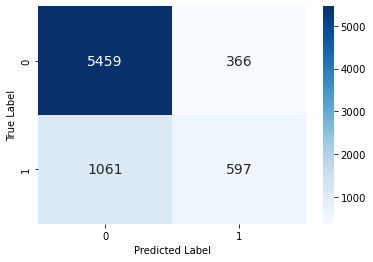

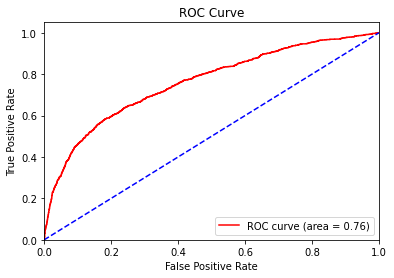

In [34]:
# performance metrics of the Model:

# Test accuracy
accuracy = accuracy_score(y_test5, y_predict_MLP_final)
print ('accuracy :', accuracy)

# per metrics
print(classification_report(y_test5, y_predict_MLP_final))

# Test - confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test5, y_predict_MLP_final)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#ROC Curve
y_score = MLP_final.predict_proba(x_test5_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()